# Multi-Class Classification

# Library Imports and Data Handling

In [2]:
from numpy import load 
import numpy as np
import tensorflow as tf
data = load('bloodmnist.npz') #put penmonia instead of bloodmnist, rest remians same
lst = data.files 
Xtrain = data[lst[0]] 
Xtest = data[lst[1]] 
Xval = data[lst[2]] 
ytrain = data[lst[3]] 
ytest = data[lst[4]] 
yval = data[lst[5]]
########
Xtrain = data[lst[0]]
ytrain = data[lst[1]]
Xval = data[lst[2]]
yval = data[lst[3]]
Xtest = data[lst[4]]
ytest = data[lst[5]]

print(Xtrain.shape) 
print(Xtest.shape) 
print(Xval.shape) 
print(ytrain.shape) 
print(ytest.shape) 
print(yval.shape)


(11959, 28, 28, 3)
(3421, 28, 28, 3)
(1712, 28, 28, 3)
(11959, 1)
(3421, 1)
(1712, 1)


In [3]:
y=[]
for i in range(len(ytrain)):
    y.append(ytrain[i][0])
y_train=np.array(y)
print(y_train.shape)
y_train

(11959,)


array([7, 3, 6, ..., 1, 6, 4], dtype=uint8)

In [4]:
y_=[]
for i in range(len(ytest)):
    y_.append(ytest[i][0])
y_test=np.array(y_)
print(y_test.shape)
y_test

(3421,)


array([3, 0, 1, ..., 3, 1, 7], dtype=uint8)

In [5]:
x=[]
for i in range(len(Xtrain)):
    x.append(Xtrain[i].flatten())
x_train=np.array(x)

x_=[]
for i in range(len(Xtest)):
    x_.append(Xtest[i].flatten())
x_test=np.array(x_)
print(x_test.shape)
x_test    

(3421, 2352)


array([[232, 200, 179, ..., 254, 228, 203],
       [239, 219, 184, ..., 178, 151, 158],
       [249, 214, 194, ..., 215, 181, 169],
       ...,
       [176, 133, 160, ..., 181, 142, 145],
       [225, 189, 175, ..., 254, 226, 202],
       [255, 229, 188, ..., 188, 150, 149]], dtype=uint8)

# Backpropagation Without DropOut

train_x's shape: (11959, 2352)
test_x's shape: (3421, 2352)
Cost:  0.27723833745142346 Train Accuracy: 19.48323438414583
Cost:  0.18992805092818013 Train Accuracy: 46.8015720377958
Cost:  0.16337054957673922 Train Accuracy: 55.26381804498703
Cost:  0.15113996788033188 Train Accuracy: 58.76745547286563
Cost:  0.1434003687007003 Train Accuracy: 60.15553139894641
Cost:  0.13614928231715248 Train Accuracy: 62.864788025754656
Cost:  0.13715801569561395 Train Accuracy: 59.0099506647713
Cost:  0.1273946244940133 Train Accuracy: 65.44861610502551
Cost:  0.11755522444528835 Train Accuracy: 66.75307299941467
Cost:  0.11563043401783696 Train Accuracy: 68.12442511915712
Cost:  0.11321232453659309 Train Accuracy: 65.87507316665273
Cost:  0.11125615510939534 Train Accuracy: 67.34676812442511
Cost:  0.10756354345302288 Train Accuracy: 66.81160632159879
Cost:  0.1054647423490685 Train Accuracy: 68.04916799063467
Cost:  0.10423019451266356 Train Accuracy: 69.30345346600888
Cost:  0.09698923065816109 Tr

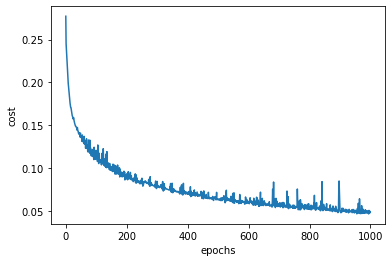

In [6]:
import numpy as np
#import datasets.mnist.loader as mnist
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
 
 
class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
    def backward(self, X, Y, lam,store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n +(lam/self.n)*store['W'+str(self.L)]
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)+(lam/self.n)*store['W'+str(l)]
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, lam,learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            derivatives = self.backward(X, Y, lam,store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()
 
 
def pre_process_data(train_x, train_y, test_x, test_y):
    # Normalize
    train_x = train_x / 255.
    test_x = test_x / 255.
 
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
 
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
 
    return train_x, train_y, test_x, test_y
 
 
if __name__ == '__main__':
    
 
    train_x, train_y, test_x, test_y = pre_process_data(x_train,y_train,x_test,y_test)
 
    print("train_x's shape: " + str(train_x.shape))
    print("test_x's shape: " + str(test_x.shape))
 
    layers_dims = [50, 8]
 
    ann = ANN(layers_dims)
    ann.fit(train_x, train_y, lam=0,learning_rate=0.1, n_iterations=10000)
    print("Train Accuracy:", ann.predict(train_x, train_y))
    print("Test Accuracy:", ann.predict(test_x, test_y))
    ann.plot_cost()

# Backpropagation With DropOut

train_x's shape: (11959, 2352)
test_x's shape: (3421, 2352)
[2352, 50, 8]
Iteration:  0 Cost:  0.27723833745142346 Train Accuracy: 18.07007274855757
Iteration:  100 Cost:  0.21553271325378281 Train Accuracy: 45.74797223848147
Iteration:  200 Cost:  0.18669379494076443 Train Accuracy: 50.87381888117736
Iteration:  300 Cost:  0.16923069358320197 Train Accuracy: 55.966217911196594
Iteration:  400 Cost:  0.15642557589495268 Train Accuracy: 60.36457897817543
Iteration:  500 Cost:  0.14589560136135254 Train Accuracy: 63.224349862028596
Iteration:  600 Cost:  0.13725963143877845 Train Accuracy: 66.12593026172758
Iteration:  700 Cost:  0.1361806074945292 Train Accuracy: 65.04724475290577
Iteration:  800 Cost:  0.1314404847076524 Train Accuracy: 65.28137804164228
Iteration:  900 Cost:  0.12709784805530522 Train Accuracy: 65.95033029517519
Iteration:  1000 Cost:  0.12201491977498233 Train Accuracy: 67.64779663851492
Iteration:  1100 Cost:  0.11834856086005799 Train Accuracy: 68.89372021071995
It

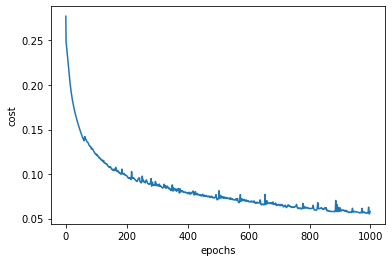

In [8]:
import numpy as np
#import datasets.mnist.loader as mnist
import matplotlib.pylab as plt
from sklearn .preprocessing import OneHotEncoder
 
 
class ANN:
    def __init__(self, layers_size,p):
        self.layers_size = layers_size
        #print(layers_size)
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.p=p
        self.costs = []
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
        print(self.layers_size)
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
            #print("W" + str(l)+" shape ")
            #print(self.parameters["W" + str(l)].shape)
            #print("b" + str(l)+" shape ")
            #print(self.parameters["b" + str(l)].shape)
            
            
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            #print("W" + str(l + 1)+"shape is")
            #print(self.parameters["W" + str(l + 1)].shape)
            #print("A "+"shape is")
            #print(A.shape)
            #print("W" + str(l+1)+" dot A shape ")
            #print(self.parameters["W" + str(l + 1)].dot(A).shape)
            #print("b" + str(l+1)+" shape ")
            #print(self.parameters["b" + str(l+1)].shape)
            
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            #print("Z shape ")
            #print(Z.shape)
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
            #print("Stored A,W,Z for index "+str(l + 1))
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
        #print("A shape is ")
        #print(A.shape)
        #print("Stored A,W,Z for index "+str(self.L))
        return A, store
    
    def forward2(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            #print("W" + str(l + 1)+"shape is")
            #print(self.parameters["W" + str(l + 1)].shape)
            #print("A "+"shape is")
            #print(A.shape)
            #print("W" + str(l+1)+" dot A shape ")
            #print(self.parameters["W" + str(l + 1)].dot(A).shape)
            #print("b" + str(l+1)+" shape ")
            #print(self.parameters["b" + str(l+1)].shape)
            
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            #print("Z shape ")
            #print(Z.shape)
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]*np.ones(self.parameters["W" + str(l + 1)].shape)*self.p
            store["Z" + str(l + 1)] = Z
            #print("Stored A,W,Z for index "+str(l + 1))
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
        #print("A shape is ")
        #print(A.shape)
        #print("Stored A,W,Z for index "+str(self.L))
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
    
 
    def backward(self, X, Y, lam,store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
        #print("self.n ",self.n)
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n +(lam/self.n)*store['W'+str(self.L)]
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
        
        
        #print("Shape of dZ is",dZ.shape)
        #print("Shape of dW is",dW.shape)
        #print("Shape of db is",db.shape)
        #print("Shape of dAPrev is",dAPrev.shape)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
        #print("shape of derivative of dW "+str(self.L)+" is ",derivatives["dW" + str(self.L)].shape)
        #print("shape of derivative of db "+str(self.L)+" is ",derivatives["db" + str(self.L)].shape)
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)+(lam/self.n)*store['W'+str(l)]
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
            #print("shape of derivative of dW "+str(l)+" is ",derivatives["dW" + str(l)].shape)
            #print("shape of derivative of db "+str(l)+" is ",derivatives["db" + str(l)].shape)
        
        #print("derivatives shape is ")
        #print(derivatives)
        return derivatives
 
    def fit(self, X, Y, lam,learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            #print("Y shape is ",Y.shape)
            #print("np.log(A.T+ 1e-8) shape is ",np.log(A.T+ 1e-8).shape )
            #print("(Y * np.log(A.T+ 1e-8)).shape is ",(Y * np.log(A.T+ 1e-8)).shape)
            #print("cost",cost)
            derivatives = self.backward(X, Y, lam,store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]*self.droputMatrix(self.p,derivatives[
                    "dW" + str(l)])
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]*self.droputMatrix(self.p,derivatives[
                    "db" + str(l)])
 
            if loop % 100 == 0:
                print("Iteration: ", loop,"Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward2(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()
        
    def droputMatrix(self,p,Mat):
        noOfOnes=int(Mat.shape[0]*Mat.shape[1]*p)
        noOfZeros=Mat.shape[0]*Mat.shape[1]-noOfOnes
        ones=np.ones(noOfOnes)
        zeroes=np.zeros(noOfZeros)
        total=np.concatenate((ones,zeroes))
        np.random.shuffle(total)
        total=total.reshape((Mat.shape[0],Mat.shape[1]))
        return total
    
        
        
 
 
def pre_process_data(train_x, train_y, test_x, test_y):
    # Normalize
    train_x = train_x / 255.
    test_x = test_x / 255.
 
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
 
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
 
    return train_x, train_y, test_x, test_y
 
 

    
    
    
if __name__ == '__main__':
    
 
    train_x, train_y, test_x, test_y = pre_process_data(x_train,y_train,x_test,y_test)
 
    print("train_x's shape: " + str(train_x.shape))
    print("test_x's shape: " + str(test_x.shape))
 
    layers_dims = [50, 8]
 
    ann = ANN(layers_dims,0.5)
    ann.fit(train_x, train_y, lam=0,learning_rate=0.1, n_iterations=10000)
    print("Train Accuracy:", ann.predict(train_x, train_y))
    print("Test Accuracy:", ann.predict(test_x, test_y))
    ann.plot_cost()

# Binary Classification

# Library Imports And Data Handling

In [8]:
from numpy import load 
import numpy as np
import tensorflow as tf
data = load('pneumoniamnist.npz') #put penmonia instead of bloodmnist, rest remians same
lst = data.files 
Xtrain = data[lst[0]] 
Xtest = data[lst[1]] 
Xval = data[lst[2]] 
ytrain = data[lst[3]] 
ytest = data[lst[4]] 
yval = data[lst[5]] 
print(Xtrain.shape) 
print(Xtest.shape) 
print(Xval.shape) 
print(ytrain.shape) 
print(ytest.shape) 
print(yval.shape)


(4708, 28, 28)
(524, 28, 28)
(624, 28, 28)
(4708, 1)
(524, 1)
(624, 1)


In [9]:
y=[]
for i in range(len(ytrain)):
    y.append(ytrain[i][0])
y_train=np.array(y)
    

In [10]:
y_=[]
for i in range(len(ytest)):
    y_.append(ytest[i][0])
y_test=np.array(y_)

In [11]:
x=[]
for i in range(len(Xtrain)):
    x.append(Xtrain[i].flatten())
x_train=np.array(x)

x_=[]
for i in range(len(Xtest)):
    x_.append(Xtest[i].flatten())
x_test=np.array(x_)
    

# Backpropagation Without Dropout

train_x's shape: (4708, 784)
test_x's shape: (524, 784)
Cost:  0.7267737801447295 Train Accuracy: 74.21410365335599
Cost:  0.18507880309109098 Train Accuracy: 84.17587085811384
Cost:  0.12016057086050604 Train Accuracy: 91.22769753610875
Cost:  0.09838218230466217 Train Accuracy: 92.43840271877654
Cost:  0.08751569030081337 Train Accuracy: 93.35174171622769
Cost:  0.216187834668708 Train Accuracy: 87.2982158028887
Cost:  0.07648781822877246 Train Accuracy: 94.11639762107052
Cost:  0.07332604281482379 Train Accuracy: 94.24384027187766
Cost:  0.07060994589905728 Train Accuracy: 94.41376380628716
Cost:  0.06822926732414426 Train Accuracy: 94.79609175870858
Cost:  0.06636932062495728 Train Accuracy: 94.9660152931181
Cost:  0.06483078603654166 Train Accuracy: 95.11469838572643
Cost:  0.06449982825025341 Train Accuracy: 95.05097706032285
Cost:  0.06318273758570098 Train Accuracy: 95.09345794392523
Cost:  0.0619352197387869 Train Accuracy: 95.28462192013593
Cost:  0.06099133322849291 Train Ac

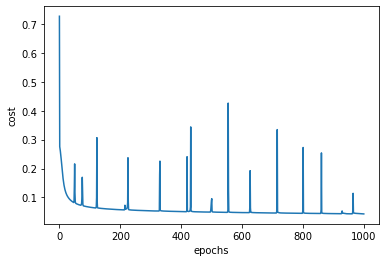

In [12]:
import numpy as np
#import datasets.mnist.loader as mnist
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
 
 
class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
    def backward(self, X, Y, lam,store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n +(lam/self.n)*store['W'+str(self.L)]
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)+(lam/self.n)*store['W'+str(l)]
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, lam,learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            derivatives = self.backward(X, Y, lam,store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()
 
 
def pre_process_data(train_x, train_y, test_x, test_y):
    # Normalize
    train_x = train_x / 255.
    test_x = test_x / 255.
 
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
 
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
 
    return train_x, train_y, test_x, test_y
 
 
if __name__ == '__main__':
    
 
    train_x, train_y, test_x, test_y = pre_process_data(x_train,y_train,x_test,y_test)
 
    print("train_x's shape: " + str(train_x.shape))
    print("test_x's shape: " + str(test_x.shape))
 
    layers_dims = [50, 2]
 
    ann = ANN(layers_dims)
    ann.fit(train_x, train_y, lam=0,learning_rate=0.1, n_iterations=10000)
    print("Train Accuracy:", ann.predict(train_x, train_y))
    print("Test Accuracy:", ann.predict(test_x, test_y))
    ann.plot_cost()

# Backpropagation with Dropout

[784, 50, 25, 2]
Cost:  0.34126977551708537 Train Accuracy: 74.21410365335599
Cost:  0.2836894573641692 Train Accuracy: 74.21410365335599
Cost:  0.28192018843509103 Train Accuracy: 74.21410365335599
Cost:  0.2797041067136716 Train Accuracy: 74.21410365335599
Cost:  0.27653722824302446 Train Accuracy: 74.21410365335599
Cost:  0.2718094443851519 Train Accuracy: 74.21410365335599
Cost:  0.2643619186953038 Train Accuracy: 74.21410365335599
Cost:  0.25272762352918854 Train Accuracy: 74.21410365335599
Cost:  0.23463237254776506 Train Accuracy: 74.21410365335599
Cost:  0.20960764154694872 Train Accuracy: 77.86745964316057
Cost:  0.18023340809549923 Train Accuracy: 84.60067969413764
Cost:  0.1536454501219401 Train Accuracy: 88.57264231096008
Cost:  0.13378564513613408 Train Accuracy: 90.29311809685642
Cost:  0.11976502246948136 Train Accuracy: 91.39762107051827
Cost:  0.11002888429328805 Train Accuracy: 91.65250637213254
Cost:  0.10277639437973153 Train Accuracy: 92.05607476635514
Cost:  0.097

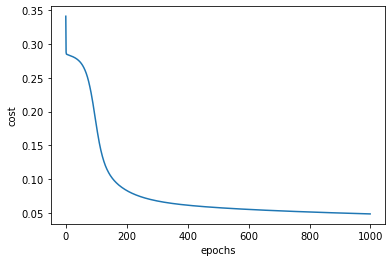

In [14]:
import numpy as np
#import datasets.mnist.loader as mnist
import matplotlib.pylab as plt
from sklearn .preprocessing import OneHotEncoder
 
 
class ANN:
    def __init__(self, layers_size,p):
        self.layers_size = layers_size
        #print(layers_size)
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.p=p
        self.costs = []
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
        print(self.layers_size)
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
            #print("W" + str(l)+" shape ")
            #print(self.parameters["W" + str(l)].shape)
            #print("b" + str(l)+" shape ")
            #print(self.parameters["b" + str(l)].shape)
            
            
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            #print("W" + str(l + 1)+"shape is")
            #print(self.parameters["W" + str(l + 1)].shape)
            #print("A "+"shape is")
            #print(A.shape)
            #print("W" + str(l+1)+" dot A shape ")
            #print(self.parameters["W" + str(l + 1)].dot(A).shape)
            #print("b" + str(l+1)+" shape ")
            #print(self.parameters["b" + str(l+1)].shape)
            
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            #print("Z shape ")
            #print(Z.shape)
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
            #print("Stored A,W,Z for index "+str(l + 1))
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
        #print("A shape is ")
        #print(A.shape)
        #print("Stored A,W,Z for index "+str(self.L))
        return A, store
    
    def forward2(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            #print("W" + str(l + 1)+"shape is")
            #print(self.parameters["W" + str(l + 1)].shape)
            #print("A "+"shape is")
            #print(A.shape)
            #print("W" + str(l+1)+" dot A shape ")
            #print(self.parameters["W" + str(l + 1)].dot(A).shape)
            #print("b" + str(l+1)+" shape ")
            #print(self.parameters["b" + str(l+1)].shape)
            
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            #print("Z shape ")
            #print(Z.shape)
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]*np.ones(self.parameters["W" + str(l + 1)].shape)*self.p
            store["Z" + str(l + 1)] = Z
            #print("Stored A,W,Z for index "+str(l + 1))
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
        #print("A shape is ")
        #print(A.shape)
        #print("Stored A,W,Z for index "+str(self.L))
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
    
 
    def backward(self, X, Y, lam,store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
        #print("self.n ",self.n)
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n +(lam/self.n)*store['W'+str(self.L)]
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
        
        
        #print("Shape of dZ is",dZ.shape)
        #print("Shape of dW is",dW.shape)
        #print("Shape of db is",db.shape)
        #print("Shape of dAPrev is",dAPrev.shape)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
        #print("shape of derivative of dW "+str(self.L)+" is ",derivatives["dW" + str(self.L)].shape)
        #print("shape of derivative of db "+str(self.L)+" is ",derivatives["db" + str(self.L)].shape)
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)+(lam/self.n)*store['W'+str(l)]
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
            #print("shape of derivative of dW "+str(l)+" is ",derivatives["dW" + str(l)].shape)
            #print("shape of derivative of db "+str(l)+" is ",derivatives["db" + str(l)].shape)
        
        #print("derivatives shape is ")
        #print(derivatives)
        return derivatives
 
    def fit(self, X, Y, lam,learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            #print("Y shape is ",Y.shape)
            #print("np.log(A.T+ 1e-8) shape is ",np.log(A.T+ 1e-8).shape )
            #print("(Y * np.log(A.T+ 1e-8)).shape is ",(Y * np.log(A.T+ 1e-8)).shape)
            #print("cost",cost)
            derivatives = self.backward(X, Y, lam,store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]*self.droputMatrix(self.p,derivatives[
                    "dW" + str(l)])
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]*self.droputMatrix(self.p,derivatives[
                    "db" + str(l)])
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward2(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()
        
    def droputMatrix(self,p,Mat):
        noOfOnes=int(Mat.shape[0]*Mat.shape[1]*p)
        noOfZeros=Mat.shape[0]*Mat.shape[1]-noOfOnes
        ones=np.ones(noOfOnes)
        zeroes=np.zeros(noOfZeros)
        total=np.concatenate((ones,zeroes))
        np.random.shuffle(total)
        total=total.reshape((Mat.shape[0],Mat.shape[1]))
        return total
    
        
        
 
 
def pre_process_data(train_x, train_y, test_x, test_y):
    # Normalize
    train_x = train_x / 255.
    test_x = test_x / 255.
 
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
 
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
 
    return train_x.reshape(len(train_x),28*28), train_y, test_x.reshape(len(test_x),28*28), test_y
 
 
if __name__ == '__main__':
    
 
    train_x, train_y, test_x, test_y = pre_process_data(Xtrain,ytrain,Xtest,ytest)
    #print(train_y)
    #print("train_x's shape: " + str(train_x.shape))
    #print("test_x's shape: " + str(test_x.shape))
    #print("train_y's shape: " + str(train_y.shape))
    #print("test_y's shape: " + str(test_y.shape))
 
    layers_dims = [50, 25, 2]
 
    ann = ANN(layers_dims,0.4)
    ann.fit(train_x, train_y, lam=0,learning_rate=0.1, n_iterations=10000)
    print("Train Accuracy:", ann.predict(train_x, train_y))
    print("Test Accuracy:", ann.predict(test_x, test_y))
    ann.plot_cost()